<p><img src="../slides/qcb-logo.png" width="215" height="100" align="right"></p>

# QCBio workshop: Machine Learning With Python -- Day3

Wenbin Guo

### Collaboratory workshop, 10/13/2022

The github repository can be accessed from this [link](https://github.com/wbvguo/qcbio-ML_w_Python.git)   

for more information about the registration information, please go to this [website](https://qcb.ucla.edu/collaboratory/workshops/w17-machine-learning-with-python/)

### Credits
Thanks Dr. Seyoon Ko and previous Collaboratory fellow Dr. Thiago S Mosqueiro and Dr. Renaud Dessalles for some supporting materials

### Goals of this notebook tutorial
- try different supervised learning algorithms for a regression problem
- try some unsupervised learning methods for dimension reduction and clustering
- regularize the model to reduce the effect of overfitting




### Table of Contents
[1. Preparation](#preparation)    
[2. Regression](#regression)    
&nbsp; &nbsp; [2.1 Linear regression](#linear_regression)    
&nbsp; &nbsp; [2.2 Polynomial regression](#poly_regression)  
&nbsp; &nbsp; [2.3 Support vector regression](#support_vec_regression)   
[3. Model regularization (penalized regression)](#model_regularization)   
&nbsp; &nbsp; [3.1 Underfitting](#underfitting)   
&nbsp; &nbsp; [3.2 Overfitting](#overfitting)  
&nbsp; &nbsp; [3.3 Good fit](#good_fit)   
&nbsp; &nbsp; [3.4 regularization by adding penalties](#regularization)   
[4. Dimension reduction (PCA)](#pca)    
[5. Clustering (K-means)](#kmeans)   

<a id='preparation'></a>
# 1. Preparation

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from toggle_cell import toggle_code as hide_solution # for teaching

<a id='regression'></a>
# 2. Regression

### prepare data

Min of X:  0.008299514379308537
Max of X:  9.669300071654517
Average of the error component:  -0.0030822739405572696


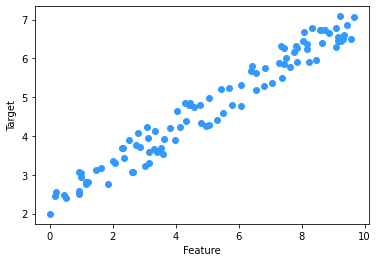

In [2]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise

print("Min of X: ", X.min())
print("Max of X: ", X.max())
print("Average of the error component: ", e.mean())

# define the intersept
Y = linearCoef*X + Intercept + e 

# plot it
plt.plot(X, Y, 'o', color=(0.2,0.6,1.0)) # color: red-green-blue. 

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

<a id='linear_regression'></a>
## 2.1 Linear regression

lt's use the linear model to fit the above data
$$ Y = \beta X + \gamma $$
If everything works out, we should expect $\beta \approx 0.5$ and $\gamma \approx 2.2$.

### split the data

In [3]:
from sklearn.model_selection import train_test_split

# features must have shape (100,1), while X has shape (100,)
X = X.reshape((numSamples,1)) 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=2022)

### train

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit( X_train , Y_train )

LinearRegression()

### visualize the fitting

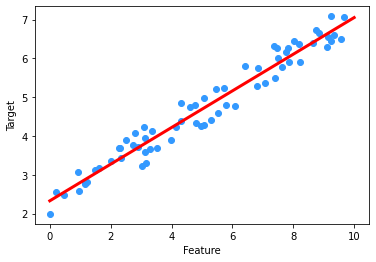

In [5]:
x_array = np.linspace(0,10,100)
y_array = model.predict( x_array.reshape((100,1)) )

plt.plot(X_train, Y_train, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

Similarly to the classifiers covered yesterday, you can access information of the fitted `LinearRegression` model  through their attributes:

### inspect the model parameters

In [6]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [0.47230272]
Intercept:    2.3296492105616546


### Performance measure

In analogy with a classifier's accuracy, the most commonly used 2 metrics to evaluate the performance of linear regression is the coefficient of determination ($R^2$) and the mean suqared error ($MSE$) or mean absolute error ($MAE$). 

$R^2$ is defined as 
$$R^2(y, \hat{y})=1-\frac{\sum_{i=1}^{N}\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^{N}\left(y_i-\bar{y}\right)^2}$$

- numerator represents total variation, or "total sum of squares"
- denominator represents unexplained variation, or "residual sum of squares"

$MSE$ is defined as 
$$\operatorname{MSE}(y, \hat{y})=\frac{1}{N} \sum_{i=1}^{N}\left(y_i-\hat{y}_i\right)^2$$

$MAE$ is defined as

$$\operatorname{MAE}(y, \hat{y})=\frac{1}{N} \sum_{i=1}^{N}\left|y_i-\hat{y}_i\right|$$

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Y_pred = model.predict(X_test)
print("R2 on the training set: ", model.score(X_test, Y_test))
print("R2 on test set: ", r2_score(Y_pred, Y_test))


print("MSE on the test: ", mean_squared_error(Y_pred, Y_test))
print("MAE on the test: ", mean_absolute_error(Y_pred, Y_test))

R2 on the training set:  0.9596185624629078
R2 on test set:  0.9520583202620791
MSE on the test:  0.09575247078554806
MAE on the test:  0.2638192680548547


<a id='poly_regression'></a>
## 2.2 Polynomial regression

A linear regression is any regression of a model that is linear on the fitting parameters, e.g., 
$$Y = \beta_1 X + \beta_2 Z + \gamma$$

What about this model?
$$Y = \beta_1 X + \beta_2 X^2 + \gamma$$

Although the model is quadratic, __this is still considered a linear regression__, and can be solved using the same methods. 

### create a 2d feature space $X$ and $X^2$

In [8]:
e.shape

(100,)

In [9]:
(linearCoef*X + 0.15*X**2 + Intercept + e).shape

(100, 100)

In [10]:
e = e.reshape((len(e),1))
Y = linearCoef*X + 0.15*X**2 + Intercept + e

In [11]:
Y.shape

(100, 1)

### visualize

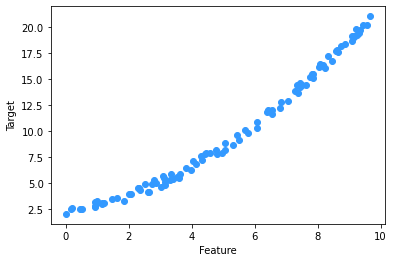

In [12]:
plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

### train test split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33, random_state=2022)

## construct the feature manually
features = np.zeros( (len(X_train),2) )
features[:,0] = X_train[:,0]
features[:,1] = X_train[:,0]**2
print(features.shape)


## import packages
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
features = poly_features.fit_transform(X_train)
print(features.shape)

print("original feature:", X_train[0])
print("transformed feature:", features[0])

(67, 2)
(67, 2)
original feature: [3.34897403]
transformed feature: [ 3.34897403 11.21562708]


### fit model

In [14]:
model = LinearRegression()
model.fit( features , Y_train )

LinearRegression()

### inspect fitting

Coefs:  [[0.47143939 0.15008516]]
Intercept:  [2.33117345]


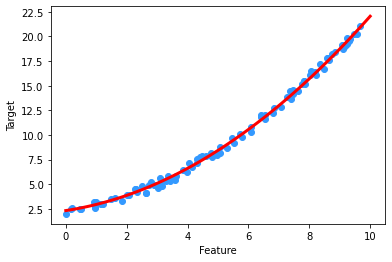

In [15]:
print("Coefs: ",model.coef_)
print("Intercept: ",model.intercept_)

x_array = np.linspace(0,10,100)
y_array =  (x_array * model.coef_[0,0] + x_array**2*model.coef_[0,1] 
                + model.intercept_)

plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [16]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylabel("MSE")
    plt.xlabel("Training set size")
    plt.legend()
    

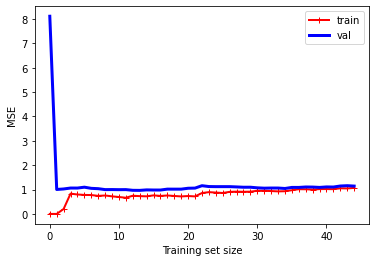

In [17]:
plot_learning_curves(LinearRegression(), X_train, Y_train)

**Exercise**: please try to calculate the performance measure on the test set

<a id='support_vec_regression'></a>
## 2.3 Support vector regression
Here we show the support vector regression as an example, there are also other algorithms can be used to fit the non-linear regression such as the tree based algorithm or neural network, we will not try here, but you are more than encouraged to try them after the workshop

In [18]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

# fit a linear SVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, Y_train)

# fit a polynomial SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, Y_train)

/home/wbguo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/wbguo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100, degree=2, kernel='poly')

In [19]:
def plot_fitting(reg, X, y, label = None, title = None):
    lw = 2
    X_sort = np.sort(X, axis=0)
    y_fit = reg.predict(X_sort)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(X_sort, y_fit, color='blue', lw=lw, label=label)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title(title)
    plt.legend()
    plt.show()

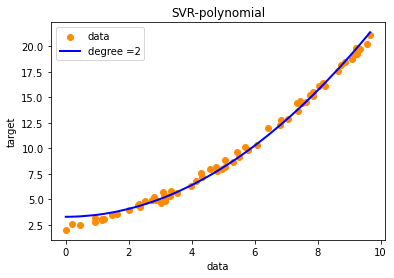

In [20]:
plot_fitting(svm_poly_reg, X_train, Y_train, title = "SVR-polynomial", label = "degree =2")

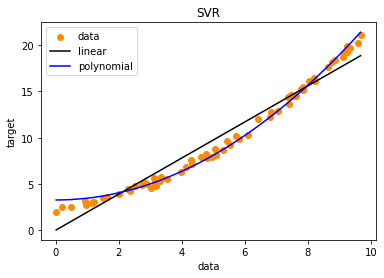

In [21]:
X_sort = np.sort(X_train, axis=0)
plt.scatter(X_train, Y_train, color='darkorange', label='data')
plt.plot(X_sort, svm_reg.predict(X_sort), color='black', label="linear")
plt.plot(X_sort, svm_poly_reg.predict(X_sort), color='blue', label="polynomial")
plt.xlabel('data')
plt.ylabel('target')
plt.title("SVR")
plt.legend()
plt.show()

<a id='model_regularization'></a>
# 3. Model regularization (penalized regression)

### Load the data

In [66]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(50, 2)


In [67]:
Y_origin = data[:,0].reshape( (data.shape[0], 1 ))   # all rows, first column
X_origin = data[:,1].reshape( (data.shape[0], 1 ))   # all rows, second column

X, X_test, Y, Y_test = train_test_split(X_origin,Y_origin,test_size=0.2, random_state=2022)

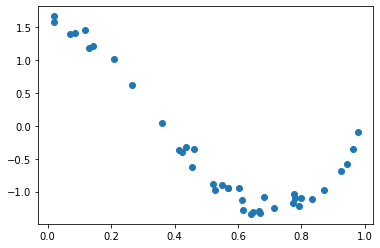

In [68]:
plt.plot(X, Y, 'o')
plt.savefig("regression_data.png", dpi=500)
plt.show()

<a id='underfitting'></a>
## 3.1 underfitting

In [69]:
model = LinearRegression()
model.fit( X , Y )

LinearRegression()

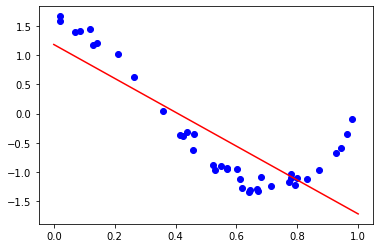

In [70]:
model = LinearRegression()
model.fit( X , Y )

x_array = np.linspace(0,1,100)
x_array = x_array.reshape((len(x_array),1))
y_array = model.predict(x_array)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.savefig('regression_underfit.png', dpi=500)
#plt.show()

<a id='overfitting'></a>
## 3.2 overfitting
We use polynomials with higher degrees to show the overfitting

In [71]:
d =20
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [78]:
X_poly

array([[9.78618342e-01, 9.57693860e-01, 9.37216777e-01, 9.17177529e-01,
        8.97566753e-01, 8.78375288e-01, 8.59594168e-01, 8.41214620e-01,
        8.23228057e-01, 8.05626076e-01, 7.88400455e-01, 7.71543146e-01,
        7.55046275e-01, 7.38902134e-01, 7.23103181e-01, 7.07642036e-01,
        6.92511477e-01, 6.77704433e-01, 6.63213989e-01, 6.49033374e-01],
       [7.91725038e-01, 6.26828536e-01, 4.96275846e-01, 3.92914013e-01,
        3.11079862e-01, 2.46289716e-01, 1.94993735e-01, 1.54381422e-01,
        1.22227637e-01, 9.67706807e-02, 7.66157709e-02, 6.06586241e-02,
        4.80249515e-02, 3.80225565e-02, 3.01034100e-02, 2.38336234e-02,
        1.88696764e-02, 1.49395953e-02, 1.18280517e-02, 9.36456464e-03],
       [4.23654799e-01, 1.79483389e-01, 7.60389992e-02, 3.22142869e-02,
        1.36477373e-02, 5.78192939e-03, 2.44954214e-03, 1.03776028e-03,
        4.39652124e-04, 1.86260732e-04, 7.89102532e-05, 3.34307075e-05,
        1.41630797e-05, 6.00025668e-06, 2.54203754e-06, 1.0769

In [72]:
model = LinearRegression()
model.fit( X_poly, Y)

LinearRegression()

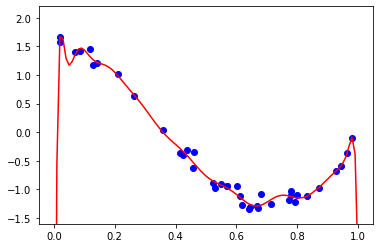

In [73]:
x_array = np.linspace(0,1,100)
x_array = x_array.reshape((x_array.shape[0], 1 ))
x_array_poly = poly_features.fit_transform(x_array)

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.ylim(-1.6, 2.2)
plt.show()

<a id='good_fit'></a>
## 3.3 Good fit

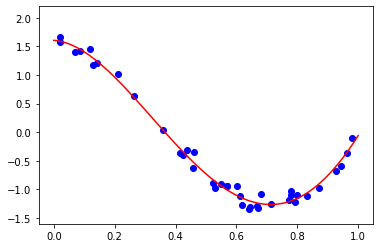

In [75]:
d =5
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X)


model = LinearRegression()
model.fit( X_poly, Y)

x_array = np.linspace(0,1,100)
x_array = x_array.reshape((x_array.shape[0], 1 ))
x_array_poly = poly_features.fit_transform(x_array)

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.ylim(-1.6, 2.2)
plt.show()

<a id='regularization'></a>
## 3.4 regularization by adding penalties

This form of overfitting is common with linear regressions. 

- Linear regression we have used thus far: minimizes the quadratic error 
$$
\min_\beta \|f_\beta(x) - y\|^2
$$

- To avoid uncontrolled increase in the model parameters, we can penalize large coefficients:
$$
\min_\beta \|f_\beta(x) - y\|^2 + \alpha \|\beta\|^2
$$

This addition of the second term is called __regularization__. $\alpha$ is a new hyperparameter introduced. 

### Ridge regression

In [76]:
from sklearn.linear_model import Ridge

In [80]:
d = 20
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X)
x_array_poly = poly_features.fit_transform(x_array)

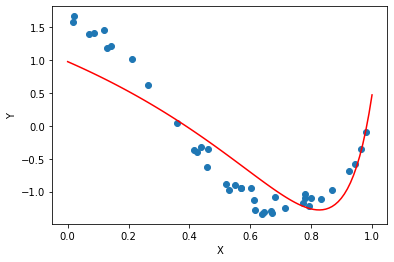

In [81]:
model = Ridge( alpha = 1.0 )
model.fit( X_poly , Y )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

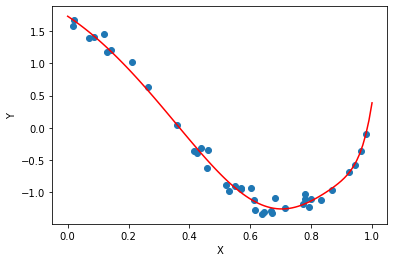

In [88]:
model = Ridge( alpha = 0.001 )
model.fit( X_poly , Y )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [89]:
model.coef_

array([[-3.12714876, -5.17110969,  0.55041706,  3.21098709,  3.29873852,
         2.27773626,  1.02681402, -0.05608264, -0.83448879, -1.29558894,
        -1.47820766, -1.43774664, -1.23004499, -0.90462732, -0.50251376,
        -0.05617022,  0.40961561,  0.87653842,  1.33155379,  1.76576431]])

In [91]:
print("MSE on the test: ", mean_squared_error(model.predict(poly_features.fit_transform(X_test)), Y_test))

MSE on the test:  0.010867384351884243


### Lasso regression

- Another popular method of regularization is via [Lasso penalty](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html):
$$
\min_\beta \|f_\beta(x) - y\|^2 + \alpha \sum_{j}|\beta_j|.
$$

By using "L1-norm", we encourage sparsity of $\beta$: some of the $\beta_j$'s will be exactly zero. This works as 

In [92]:
from sklearn.linear_model import Lasso
model = Lasso( alpha = 0.00001 )
model.fit( X_poly , Y )

/home/wbguo/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1631882590667899, tolerance: 0.0037824724181819962
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-05)

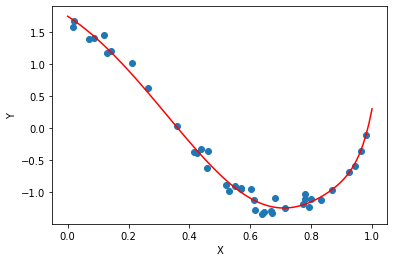

In [93]:
plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [94]:
model.coef_

array([-3.06188885, -6.777661  ,  3.47698372,  3.86557598,  2.23236383,
        0.77932389, -0.        , -0.53072712, -0.88006375, -0.91179815,
       -0.80042051, -0.61395934, -0.39222686, -0.15944532, -0.        ,
       -0.        ,  0.        ,  0.61551149,  0.78656819,  0.92373287])

In [95]:
print("MSE on the test: ", mean_squared_error(model.predict(poly_features.fit_transform(X_test)), Y_test))

MSE on the test:  0.011922828543735586


**Exercise** : compare the coefficients of lasso and ridge, what did you find?

We can also combine the two to get better performance: it's called [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html). 

<a id='pca'></a>
# 4. Dimension reduction (PCA)

we will use the MNIST dataset for the unsupervised learning practice. Here we will use digits 1, 5, 6. each image is 28x28 with values from 0-255. for more information, please refer to this [link](http://yann.lecun.com/exdb/mnist/)

<p><img src="MnistExamples.png" width="500" height="100" align="center"></p>

In [135]:
train_x = np.load('./mnist_train_images.npy')
train_y = np.load('./mnist_train_labels.npy')
test_x = np.load('./mnist_test_images.npy')
test_y = np.load('./mnist_test_labels.npy')

n_train = train_x.shape[0]
n_test = test_x.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_x.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_x.shape))

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)


(784,)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


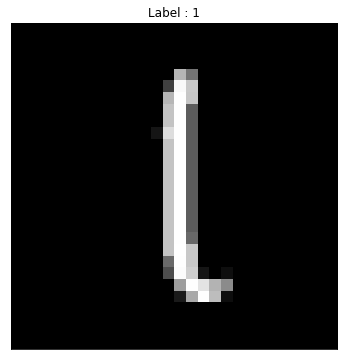

In [142]:
idx = np.random.randint(train_x.shape[0])
print(train_x[idx].shape)
print(train_y[idx])
img = train_x[idx].reshape(28,28)


plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx,:])))
plt.xticks([])
plt.yticks([])
plt.show()

In [147]:
# convert one-hot encoding to labels
train_y_label = np.where(train_y)[1]
test_y_label  = np.where(test_y)[1]

### run PCA
since the value is from 0-255, we will not perform the scaling here, in other examples, you might need to consider perform scaling or standadization first before running PCA

In [110]:
from sklearn.decomposition import PCA

In [114]:
pca = PCA()
pca.fit( train_x )

PCA()

### Explained variance ratio for each PC

In [119]:
pca.explained_variance_ratio_

array([1.67049810e-01, 8.68293419e-02, 7.38108978e-02, 7.04225898e-02,
       4.43760417e-02, 3.56074162e-02, 2.87533719e-02, 2.69804467e-02,
       2.32602712e-02, 2.01250706e-02, 1.80052835e-02, 1.71571262e-02,
       1.51613960e-02, 1.50276441e-02, 1.34597979e-02, 1.26141170e-02,
       1.17572909e-02, 1.11460052e-02, 1.06456215e-02, 9.58152860e-03,
       8.81693698e-03, 8.24851822e-03, 7.91743025e-03, 7.12096132e-03,
       6.94172969e-03, 6.64638216e-03, 6.49646018e-03, 5.97613398e-03,
       5.60540892e-03, 5.46505628e-03, 5.22008957e-03, 5.16841467e-03,
       4.91286954e-03, 4.61977394e-03, 4.41680383e-03, 4.35212301e-03,
       4.32779128e-03, 3.91748454e-03, 3.91255086e-03, 3.69875273e-03,
       3.57106444e-03, 3.51882353e-03, 3.42525961e-03, 3.20785400e-03,
       3.14347469e-03, 3.05403443e-03, 2.87376740e-03, 2.86786910e-03,
       2.77049816e-03, 2.58995104e-03, 2.56367819e-03, 2.49359990e-03,
       2.47663027e-03, 2.37528142e-03, 2.30796775e-03, 2.27783038e-03,
      

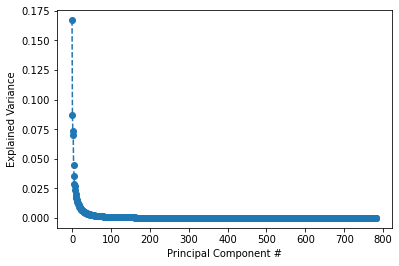

In [115]:
plt.plot( pca.explained_variance_ratio_, 'o--' )
plt.ylabel( 'Explained Variance' )
plt.xlabel( 'Principal Component #' )
plt.show()

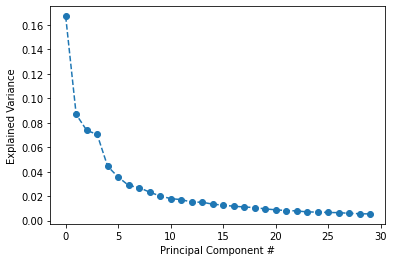

In [118]:
plt.plot( pca.explained_variance_ratio_[0:30], 'o--' ) # showing top 30 percent
plt.ylabel( 'Explained Variance' )
plt.xlabel( 'Principal Component #' )
plt.show()

### choosing the right PCs

In [164]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.80) + 1

In [165]:
d

34

There is also another option that to choose the PCs at elbow point (the explained variance stops growing fast): 

<p><img src="pca_elbow.jpg" width="500" height="100" align="center"></p>

### visualization 
As a __dimensionality reduction__, we can choose only the first two principal components. To perform the dimension reduction, use `transform()` method

In [127]:
# to project the matrix on the previous extracted principal components
train_x_pca = pca.transform(train_x) 

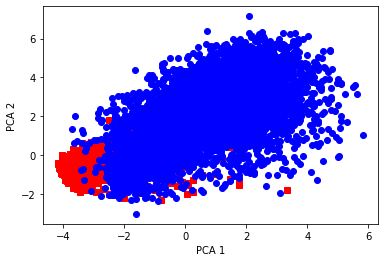

In [144]:
index1 = (train_y_label == 1)
index5 = (train_y_label == 5)

plt.plot( train_x_pca[index1,0], 
         train_x_pca[index1,1], 's', color='r' ) 
plt.plot( train_x_pca[index5,0], 
         train_x_pca[index5,1], 'o', color='b' ) 

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

**We can apply any other machine learning methods we learned in this workshop on the data with the reduced dimension.**

In [145]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
clf.fit(train_x_pca[:, :2], train_y_label)

RandomForestClassifier(max_depth=5)

In [148]:
test_x_pca = pca.transform( test_x )
clf.score(test_x_pca[:,:2], test_y_label)

0.9276381909547738

<a id='kmeans'></a>
# 5. Clustering (K-means)

 Because we know there are three digits in this dataset, let's make an educated guess and use $K=3$ (i.e., we will set the parameter ```n_clusters``` to 3).

In [149]:
from sklearn.cluster import KMeans
kmeans = KMeans( n_clusters=3 )
kmeans.fit( train_x )

KMeans(n_clusters=3)

After the K-means method is applied to the dataset, we can then get the ID of the clusters to which each of the samples is predicted to belong to by using the method ```predict```. 

In [150]:
clusters = kmeans.predict( train_x )
print( "Shape: ", clusters.shape )
print( "Cluster IDs: ", clusters )

Shape:  (16583,)
Cluster IDs:  [0 1 1 ... 1 2 0]


Let's visualize the resulting clustering by color-coding each cluster ID. This is very similar to how we color-coded different classes in classification datasets.

In [151]:
km_index0 = clusters == 0
km_index1 = clusters == 1
km_index2 = clusters == 2

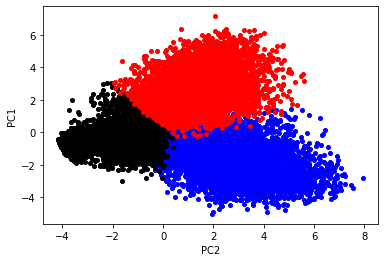

In [157]:
plt.plot( train_x_pca[km_index0,0], train_x_pca[km_index0,1], 
            'o', color='b', markersize=4 )
plt.plot( train_x_pca[km_index1,0], train_x_pca[km_index1,1], 
            'o', color='k', markersize=4 )
plt.plot( train_x_pca[km_index2,0], train_x_pca[km_index2,1], 
            'o', color='r', markersize=4 )

plt.xlabel('PC2')
plt.ylabel('PC1')

plt.show()

If K is not known, one might need to use `silhouette_score` to find the most potential Ks, for more information, please refer to [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [158]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 5

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans= KMeans(n_clusters = k).fit(train_x)
    sil.append(silhouette_score(train_x, kmeans.labels_, metric = 'euclidean'))

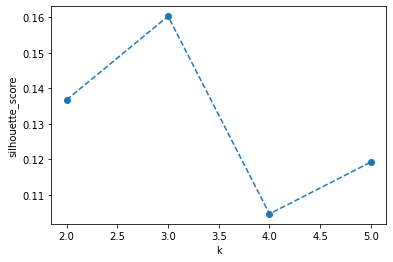

In [161]:
plt.plot(range(2, kmax+1), sil, 'o--' )
plt.ylabel( 'silhouette_score' )
plt.xlabel( 'k' )
plt.show()

In [160]:
sil

[0.13673966, 0.16030036, 0.1046115, 0.119233206]